# **Latihan 5 Komputasi Statistika (B)**
## Kelompok: 8

### Anggota Kelompok:
1. Muhamad Rakan Akmal (2106635745)
1. Raqi Akbar Robbani (2106652562)
1. Rima F Azahra (2106701974)
1. Wahyu Dimasdi Putra (2106704736)
1. Kamal Muftie Yafi (2106725034)

# Distance and Similarity
Case Study

###**Euclidean Distance**

In [ ]:
# Python code to find Euclidean distance
# using linalg.norm()

import numpy as np

# initializing points in
# numpy arrays
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))

# calculating Euclidean distance
# using linalg.norm()
dist = np.linalg.norm(point1 - point2)

# printing Euclidean distance
print(dist)


2.23606797749979


In [ ]:
# Python code to find Euclidean distance
# using dot()

import numpy as np

# initializing points in
# numpy arrays
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))

# subtracting vector
temp = point1 - point2

# doing dot product
# for finding
# sum of the squares
sum_sq = np.dot(temp.T, temp)

# Doing squareroot and
# printing Euclidean distance
print(np.sqrt(sum_sq))


2.23606797749979


In [ ]:
# Python code to find Euclidean distance
# using sum() and square()

import numpy as np

# initializing points in
# numpy arrays
point1 = np.array((1, 2, 3))
point2 = np.array((1, 1, 1))

# finding sum of squares
sum_sq = np.sum(np.square(point1 - point2))

# Doing squareroot and
# printing Euclidean distance
print(np.sqrt(sum_sq))


2.23606797749979


### **KMeans Clustering using different distance metrics**
* Lakukan implementasi clustering menggunakan KMeans dengan 3 distance metric yang berbeda. 
* Lakukan implementasi KMeans untuk nilai K=3, 4, dan 5. Bandingkan hasil tersebut berdasarkan Purity Score.


In [ ]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = pd.read_csv('https://raw.githubusercontent.com/rakanakml17/Latihan-5/main/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = iris.iloc[:, 1:5].values # feature matrix
y = iris.iloc[:, -1].values # class matrix

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

### **K-Means = 3**

In [ ]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'manhattan': 1, 'chebyshev': 2}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 88.67%
The purity score for manhattan distance is 88.67%
The purity score for chebyshev distance is 88.67%


### **K-Means = 4**

In [ ]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'manhattan': 1, 'chebyshev': 2}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 85.33%
The purity score for manhattan distance is 85.33%
The purity score for chebyshev distance is 84.67%


### **K-Means = 5**

In [ ]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'manhattan': 1, 'chebyshev': 2}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 5, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 98.0%
The purity score for manhattan distance is 98.0%
The purity score for chebyshev distance is 97.33%


### **Kesimpulan**

Pada 3 nilai *k-means* yang berbeda dengan `random_state = 5`, terlihat bahwa untuk $k = 5$ memiliki *purity score* terbesar, yaitu sebesar 98% untuk *euclidiean distance* dan *manhattan distance*, serta untuk *chebyshev distance* sebesar 97.33%. Sedangkan, $k = 3$ memiliki *purity score* yang sama sebesar 88.67% untuk ketiga *distance*. Selain itu, untuk $k = 4$ memiliki *purity score* sebesar 85.33% untuk *euclidiean distance* dan *manhattan distance*, serta untuk *chebyshev distance* sebesar 84.67%

###**Similarity Measures for Binary Data**

Hitunglah Jaccard score untuk data berikut:
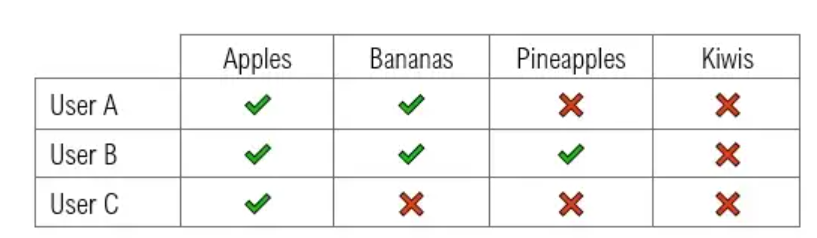

In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score
userA = np.array([[1, 1, 0, 0]])
userB = np.array([[1, 1, 1, 0]])
userC = np.array([[1, 0, 0, 0]])

In [ ]:
ab = jaccard_score(userA, userB, average = 'samples')
bc = jaccard_score(userB, userC, average = 'samples')
ac = jaccard_score(userA, userC, average = 'samples')
print(ab)
print(bc)
print(ac)

0.6666666666666666
0.3333333333333333
0.5
